# **NaturalQ** - "Conversion of natural language to SQL queries using LLMs"
🧠 **NaturalQ** is a project is aimed to enable users to make conversations with the data that they want to know more about. This tool comprises of multiple components out of which vanna.ai is one of the integration that could streamline the process of converting natural language to SQL queries in a robust manner.

### ⚙️ Installing the required dependencies

*   vanna[chromadb,openai,snowflake]


##### 🛠 For making any chnages to the source code of the vanna.ai, kindly fork the repository using https://github.com/vanna-ai/vanna



In [ ]:
%pip install 'vanna[chromadb,openai,snowflake]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

### 📲 Import the libraries
- The imports can be changed as per the LLMs, VectorDB and Databases with which we want to build the tool. (**Bring Your Own [LLM, VectorDB, DB]**)

In [ ]:
from vanna.openai import OpenAI_Chat
from vanna.chromadb import ChromaDB_VectorStore


### Initializing the class MyVanna

In [ ]:



class MyVanna ( ChromaDB_VectorStore , OpenAI_Chat ) :
    def __init__ ( self , config=None ) :
        ChromaDB_VectorStore.__init__ ( self , config = config )
        OpenAI_Chat.__init__ ( self , config = config )


# Connecting to openAI gpt-4o
vn = MyVanna ( config = {
    'api_key' : '' ,
    'model' : 'gpt-4o'} )


### 🔌 Connecting to the Snowflake Database using the vanna.ai native library connect_to_snowflake

In [ ]:

vn.connect_to_snowflake ( account = "" , username = "" , password = "" ,
                          database = "" , role = "" , )


### 💾 Training the model specific to the DB

In [ ]:

df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

plan = vn.get_training_plan_generic(df_information_schema)
vn.train(plan=plan)



/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:02<00:00, 33.7MiB/s]


In [ ]:


# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
    CREATE TABLE IF NOT EXISTS my-table (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT
    )
""")


# Add SQL queries to your training data. This is useful if you have some queries already laying around.
vn.train ( sql = """
         SELECT
       timeGenerated::DATE AS alert_date,
       COUNT(*) AS total_alerts
   FROM
       AzureSentinel
   GROUP BY
       alert_date
   ORDER BY
       alert_date;
         """ )


Adding ddl: 
    CREATE TABLE IF NOT EXISTS my-table (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT
    )

Using model gpt-4o for 101.0 tokens (approx)
Question generated with sql: How many alerts were generated each day? 
Adding SQL...


'e48efb56-e50e-5b92-9988-acacc20adf5e-sql'

In [ ]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,e48efb56-e50e-5b92-9988-acacc20adf5e-sql,How many alerts were generated each day?,\n SELECT\n timeGenerated::DATE ...,sql
0,4aafa9de-6443-5409-86f9-5d581327d6a0-ddl,None,\n CREATE TABLE IF NOT EXISTS my-table (\n ...,ddl
0,d108a83b-8c4f-5efe-b442-6453bdbfe487-doc,None,The following columns are in the SENTINELONE t...,documentation
1,b46fcb79-54e9-51c6-8be7-f465850f2feb-doc,None,The following columns are in the SPLUNK table ...,documentation
2,01358c56-768a-5f86-8a16-41c971c43e4e-doc,None,The following columns are in the CHECKPOINTLOG...,documentation
3,e14e0bb1-8010-5609-8702-ecae27aee290-doc,None,The following columns are in the AWSCLOUDTRAIL...,documentation
4,6ce3b0dd-8dfd-5322-884c-506b318e90da-doc,None,The following columns are in the ELASTICSECURI...,documentation
5,a4c7eba0-154c-5ea3-90e7-38a9e425fad6-doc,None,The following columns are in the AZURESENTINEL...,documentation
6,23d174a2-be5d-512d-9c69-7ed0c3b44b3b-doc,None,The following columns are in the SOLARWINDSLOG...,documentation
7,6e8ec58d-1a03-5917-899c-814b3d6b238d-doc,None,The following columns are in the CROWDSTRIKE t...,documentation


In [ ]:
# You can remove training data if there's obsolete/incorrect information.
vn.remove_training_data(id='1-ddl')


True

## Asking the AI

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the CROWDSTRIKE table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME   | COLUMN_NAME   | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:-------------|:--------------|:--------------|:----------|\n| 632 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | UPDATE_STATUS | TEXT          |           |\n| 633 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | HOST_NAME     | TEXT          |           |\n| 640 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | EVENT_TYPE    | TEXT        

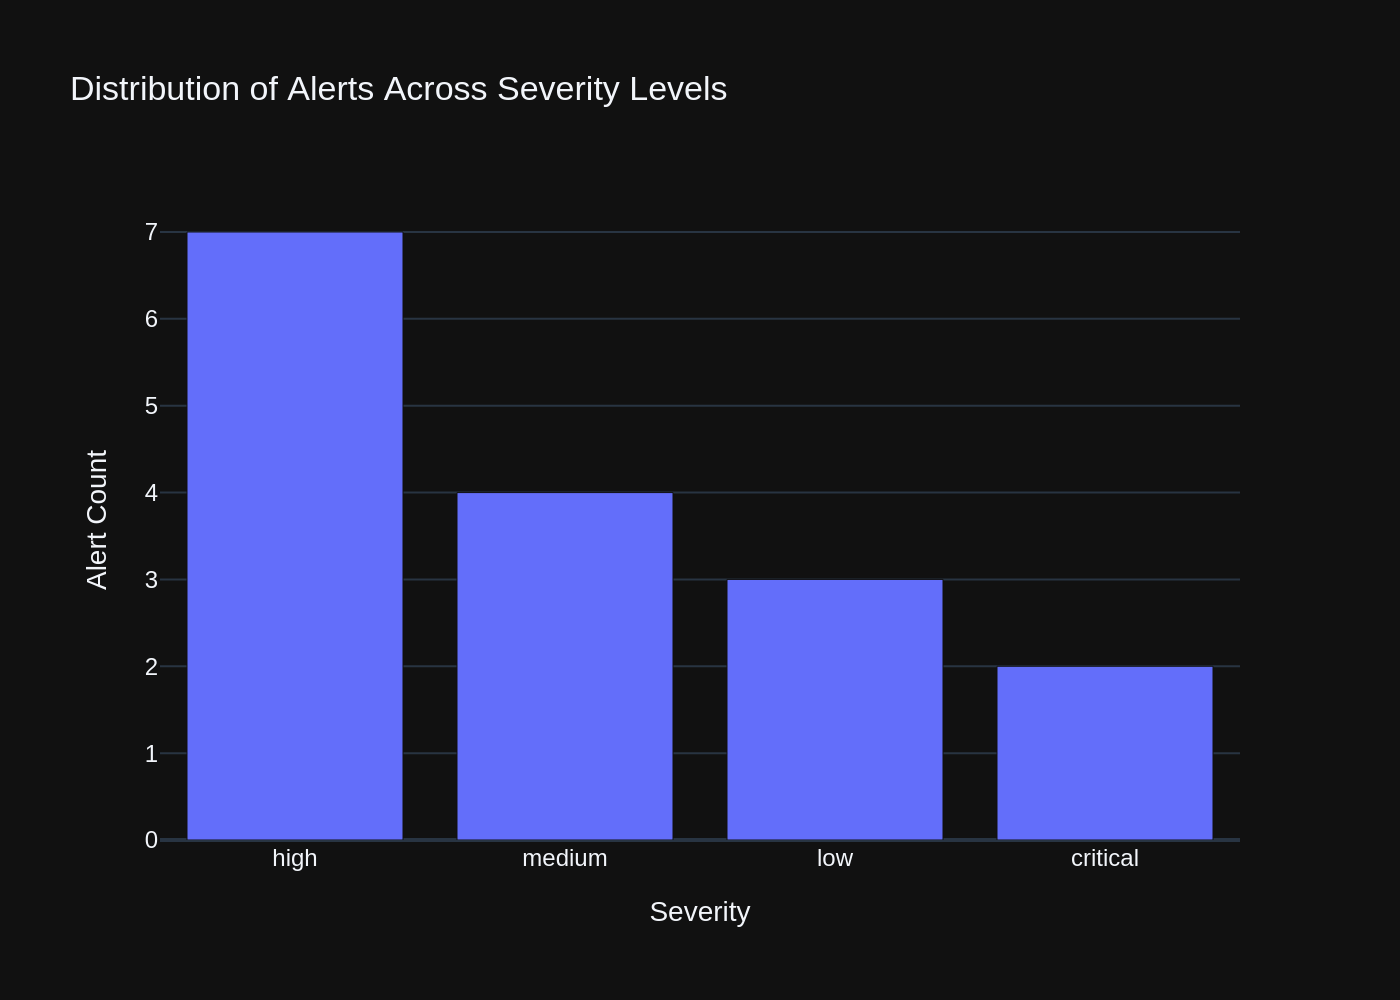

('SELECT\n    SEVERITY,\n    COUNT(*) AS alert_count\nFROM\n    CRQ_DB.TOOLS_SCHEMA.AZURESENTINEL\nGROUP BY\n    SEVERITY\nORDER BY\n    alert_count DESC;',
    SEVERITY  ALERT_COUNT
 0      high            7
 1    medium            4
 2       low            3
 3  critical            2,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'SEVERITY=%{x}<br>ALERT_COUNT=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['high', 'medium', 'low', 'critical'], dtype=object),
               'xaxis': 'x',
               'y': array([7, 4, 3, 2]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
 

In [ ]:
# Sample Questions that can be ased to the trained model
vn.ask(question= 'Analyze the distribution of alerts across severity levels to prioritize incident responses.')

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the SENTINELONE table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME   | COLUMN_NAME    | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:-------------|:---------------|:--------------|:----------|\n|   0 | CRQ_DB          | TOOLS_SCHEMA   | SENTINELONE  | PROCESS_NAME   | TEXT          |           |\n| 634 | CRQ_DB          | TOOLS_SCHEMA   | SENTINELONE  | EVENT_TYPE     | TEXT          |           |\n| 647 | CRQ_DB          | TOOLS_SCHEMA   | SENTINELONE  | APP_NAME       | TEXT   

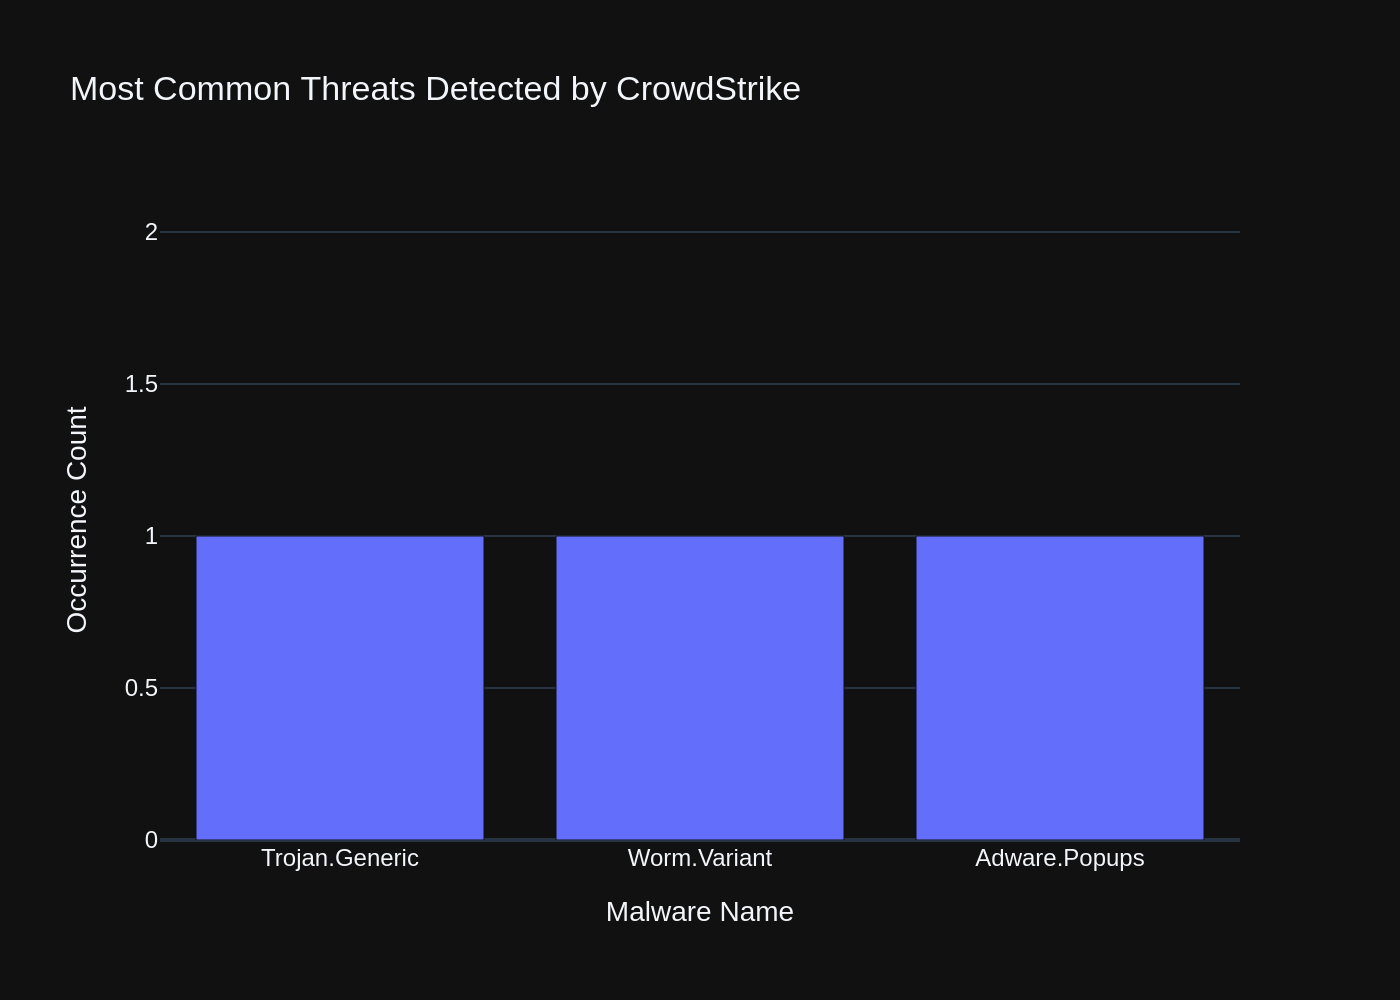

('SELECT\n    MALWARE_NAME,\n    COUNT(*) AS occurrence_count\nFROM\n    CRQ_DB.TOOLS_SCHEMA.CROWDSTRIKE\nGROUP BY\n    MALWARE_NAME\nORDER BY\n    occurrence_count DESC\nLIMIT 10;',
      MALWARE_NAME  OCCURRENCE_COUNT
 0            None                 2
 1  Trojan.Generic                 1
 2    Worm.Variant                 1
 3   Adware.Popups                 1,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Malware Name=%{x}<br>Occurrence Count=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([None, 'Trojan.Generic', 'Worm.Variant', 'Adware.Popups'], dtype=object),
               'xaxis': 'x',
               'y': array([2, 1, 1, 1]),
         

In [ ]:
vn.ask(question= 'List the most common threats or process names detected by SentinelOne and CrowdStrike.')

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the AZURESENTINEL table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME    | COLUMN_NAME    | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:--------------|:---------------|:--------------|:----------|\n|  10 | CRQ_DB          | TOOLS_SCHEMA   | AZURESENTINEL | ALERTID        | TEXT          |           |\n| 627 | CRQ_DB          | TOOLS_SCHEMA   | AZURESENTINEL | ENTITIES       | TEXT          |           |\n| 642 | CRQ_DB          | TOOLS_SCHEMA   | AZURESENTINEL | SUBSCRIPTIONID | 

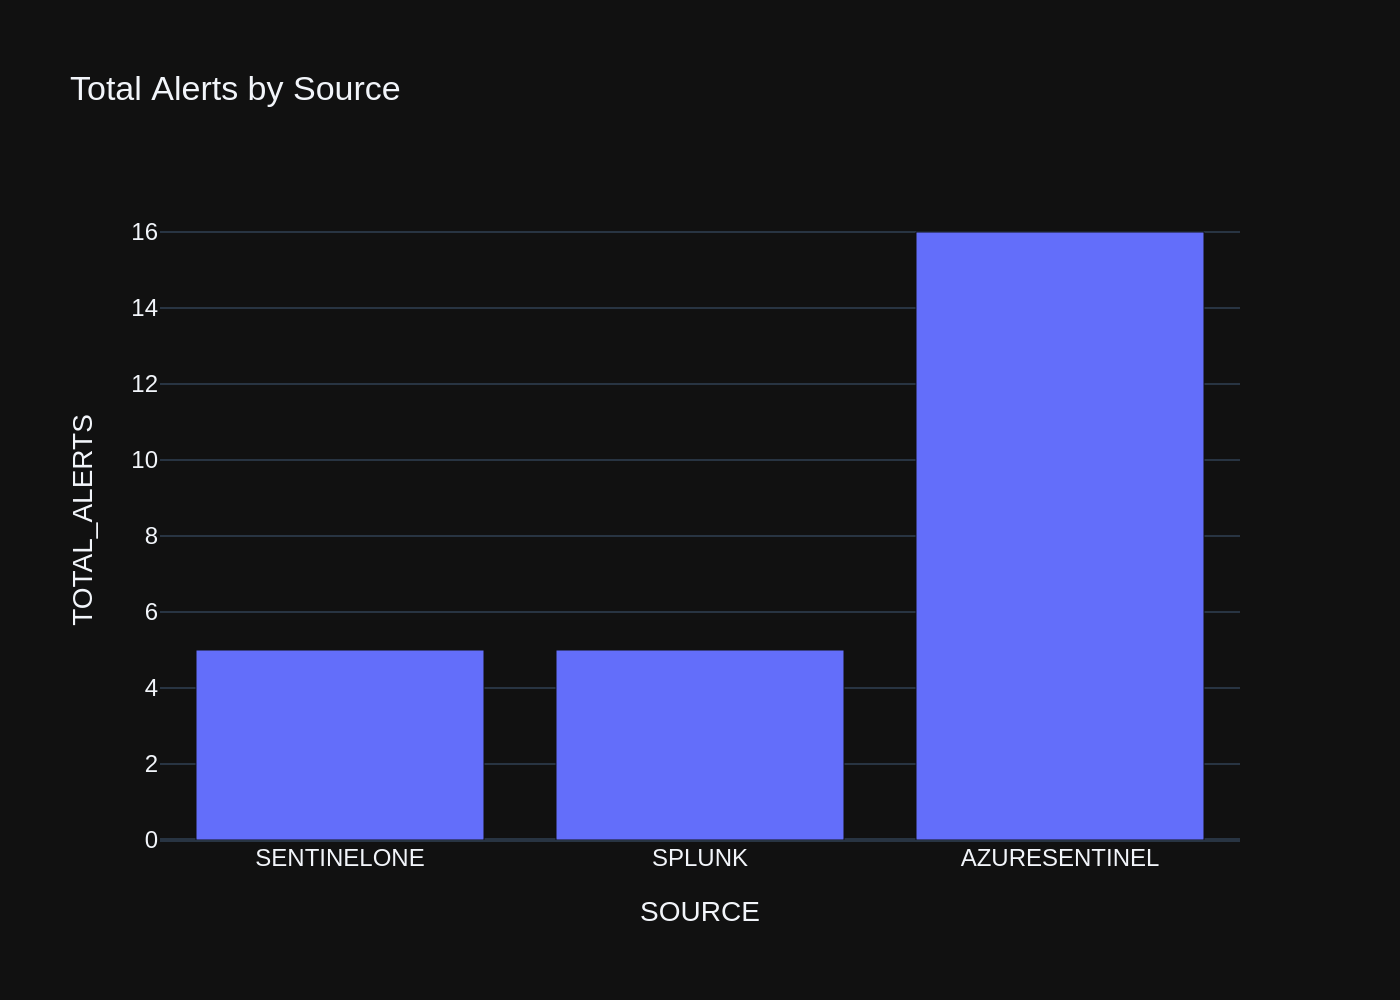

("SELECT\n    'SENTINELONE' AS source,\n    COUNT(*) AS total_alerts\nFROM\n    CRQ_DB.TOOLS_SCHEMA.SENTINELONE\n\nUNION ALL\n\nSELECT\n    'SPLUNK' AS source,\n    COUNT(*) AS total_alerts\nFROM\n    CRQ_DB.TOOLS_SCHEMA.SPLUNK\n\nUNION ALL\n\nSELECT\n    'AZURESENTINEL' AS source,\n    COUNT(*) AS total_alerts\nFROM\n    CRQ_DB.TOOLS_SCHEMA.AZURESENTINEL;",
           SOURCE  TOTAL_ALERTS
 0    SENTINELONE             5
 1         SPLUNK             5
 2  AZURESENTINEL            16,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'SOURCE=%{x}<br>TOTAL_ALERTS=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['SENTINELONE', 'SPLUNK', 'AZURESENTINEL']

In [ ]:
vn.ask(question = 'Give me the total number of alerts from sentinelone, splunk and azure sentinel')

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the CROWDSTRIKE table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME   | COLUMN_NAME   | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:-------------|:--------------|:--------------|:----------|\n| 632 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | UPDATE_STATUS | TEXT          |           |\n| 633 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | HOST_NAME     | TEXT          |           |\n| 640 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | EVENT_TYPE    | TEXT        

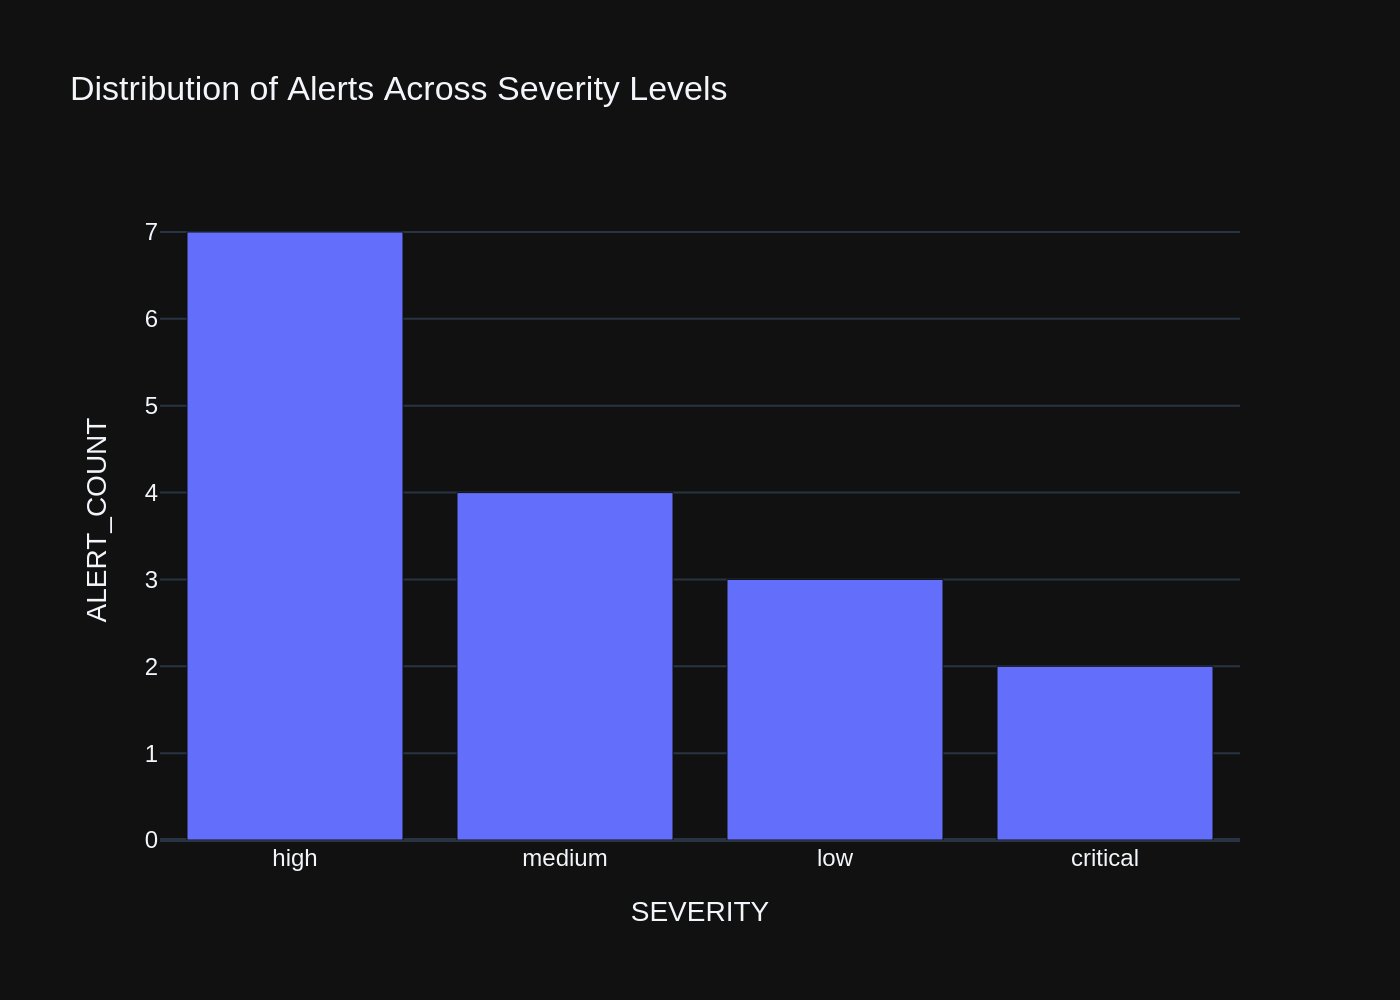

('SELECT\n    SEVERITY,\n    COUNT(*) AS alert_count\nFROM\n    CRQ_DB.TOOLS_SCHEMA.AZURESENTINEL\nGROUP BY\n    SEVERITY\nORDER BY\n    alert_count DESC;',
    SEVERITY  ALERT_COUNT
 0      high            7
 1    medium            4
 2       low            3
 3  critical            2,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'SEVERITY=%{x}<br>ALERT_COUNT=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['high', 'medium', 'low', 'critical'], dtype=object),
               'xaxis': 'x',
               'y': array([7, 4, 3, 2]),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
 

In [ ]:
vn.ask(question = 'Analyze the distribution of alerts across severity levels to prioritize incident responses')

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the AZURESENTINEL table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME    | COLUMN_NAME    | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:--------------|:---------------|:--------------|:----------|\n|  10 | CRQ_DB          | TOOLS_SCHEMA   | AZURESENTINEL | ALERTID        | TEXT          |           |\n| 627 | CRQ_DB          | TOOLS_SCHEMA   | AZURESENTINEL | ENTITIES       | TEXT          |           |\n| 642 | CRQ_DB          | TOOLS_SCHEMA   | AZURESENTINEL | SUBSCRIPTIONID | 

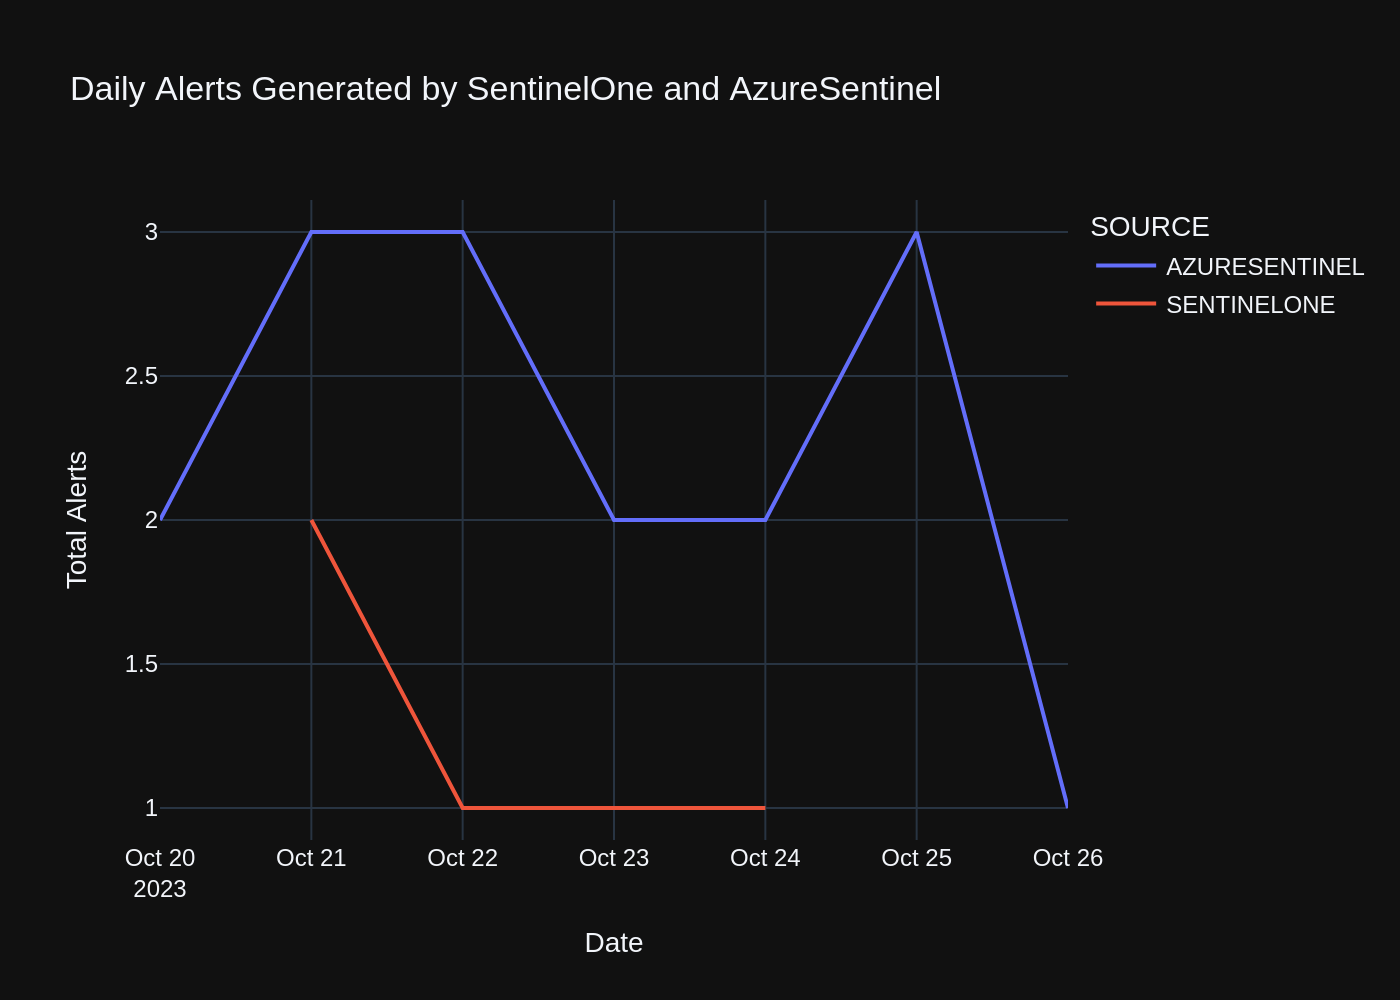

("SELECT\n    alert_date,\n    source,\n    COUNT(*) AS total_alerts\nFROM (\n    SELECT\n        TIMESTAMP::DATE AS alert_date,\n        'SENTINELONE' AS source\n    FROM\n        CRQ_DB.TOOLS_SCHEMA.SENTINELONE\n\n    UNION ALL\n\n    SELECT\n        TIMEGENERATED::DATE AS alert_date,\n        'AZURESENTINEL' AS source\n    FROM\n        CRQ_DB.TOOLS_SCHEMA.AZURESENTINEL\n)\nGROUP BY\n    alert_date,\n    source\nORDER BY\n    alert_date,\n    source;",
     ALERT_DATE         SOURCE  TOTAL_ALERTS
 0   2023-10-20  AZURESENTINEL             2
 1   2023-10-21  AZURESENTINEL             3
 2   2023-10-21    SENTINELONE             2
 3   2023-10-22  AZURESENTINEL             3
 4   2023-10-22    SENTINELONE             1
 5   2023-10-23  AZURESENTINEL             2
 6   2023-10-23    SENTINELONE             1
 7   2023-10-24  AZURESENTINEL             2
 8   2023-10-24    SENTINELONE             1
 9   2023-10-25  AZURESENTINEL             3
 10  2023-10-26  AZURESENTINEL             1,

In [ ]:
vn.ask(question = 'Compare the number of alerts generated each day by SentinelOne and AzureSentinel')

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the SOLARWINDSLOGS table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME     | COLUMN_NAME         | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:---------------|:--------------------|:--------------|:----------|\n| 630 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWINDSLOGS | ISSUE_RESOLVED_TIME | TIMESTAMP_NTZ |           |\n| 649 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWINDSLOGS | ISSUE_DESCRIPTION   | TEXT          |           |\n| 657 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWIN

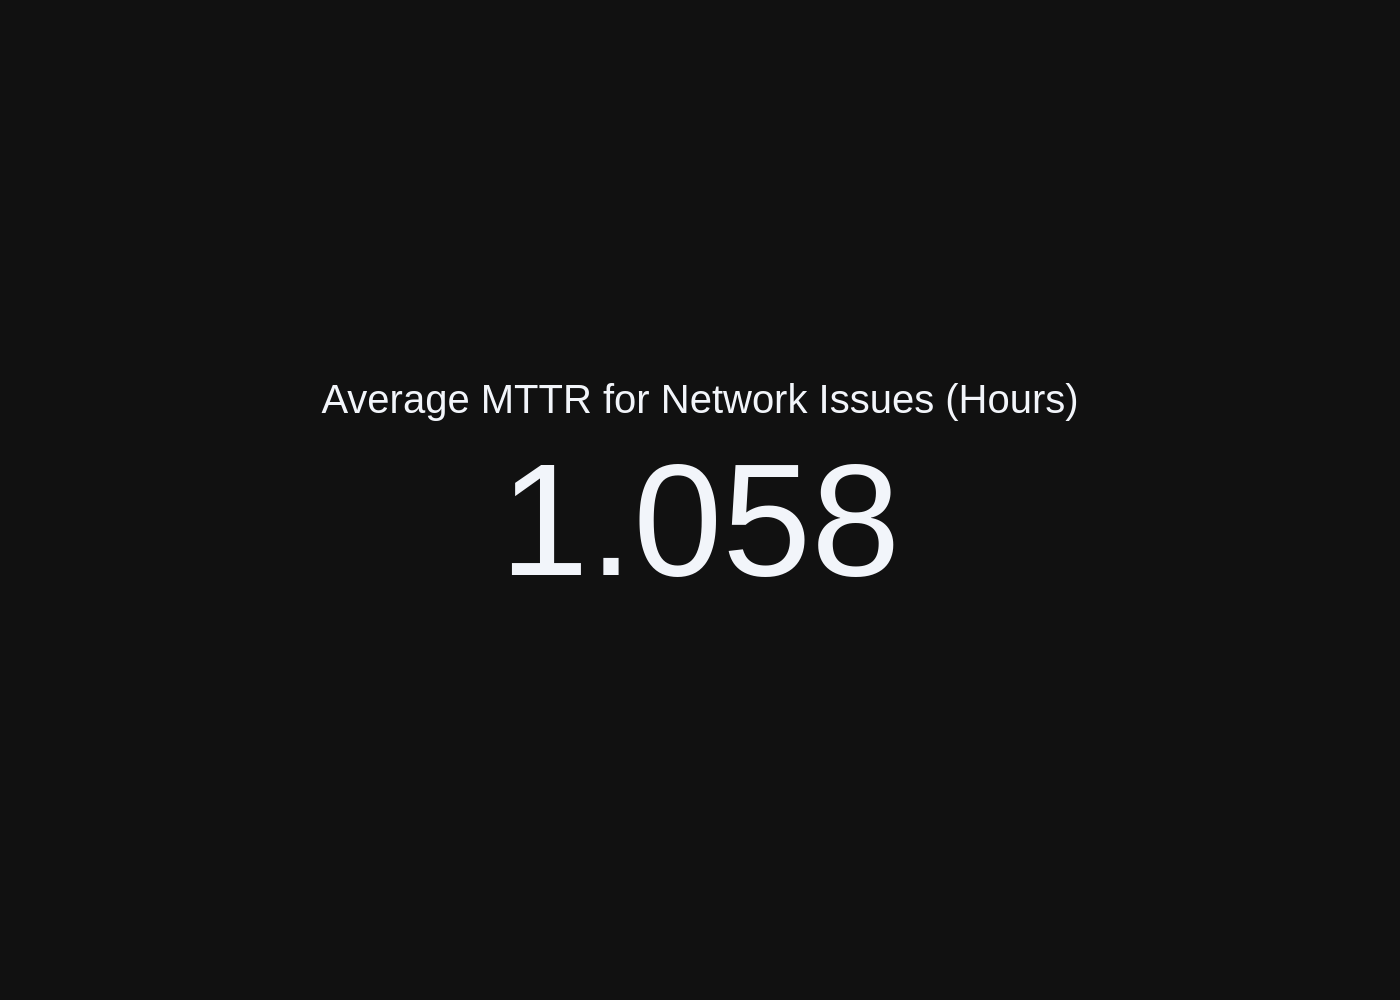

("SELECT\n    AVG(DATEDIFF('second', ISSUE_START_TIME, ISSUE_RESOLVED_TIME)) / 3600 AS average_mttr_hours\nFROM\n    CRQ_DB.TOOLS_SCHEMA.SOLARWINDSLOGS\nWHERE\n    ISSUE_RESOLVED_TIME IS NOT NULL\n    AND ISSUE_START_TIME IS NOT NULL;",
   AVERAGE_MTTR_HOURS
 0     1.058333333333,
 Figure({
     'data': [{'mode': 'number',
               'title': {'text': 'Average MTTR for Network Issues (Hours)'},
               'type': 'indicator',
               'value': 1.058333333333}],
     'layout': {'template': '...'}
 }))

In [ ]:
vn.ask(question = 'Calculate MTTR for network issues using SolarWinds logs')

### 💻 Flask Application (Vanna.ai Native Flask Application)
- You can build your own flask application or use streamlit custo templates to create a chat interface.
- With this you can also consume the native UI features of the Vanna.ai as show below.

In [ ]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Google Colab doesn't support running websocket servers. Disabling debug mode.
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

Your app is running at:
https://bmu7kfc9gv-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off


SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the EVENT_TABLES table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA       | TABLE_NAME   | COLUMN_NAME   | DATA_TYPE     | COMMENT                                    |\n|----:|:----------------|:-------------------|:-------------|:--------------|:--------------|:-------------------------------------------|\n| 514 | CRQ_DB          | INFORMATION_SCHEMA | EVENT_TABLES | TABLE_CATALOG | TEXT          | Database that the event table belongs to   |\n| 515 | CRQ_DB          | INFORMATION_SCHEMA | EVENT_TABLES | TABLE_SCHEMA  |

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the SOLARWINDSLOGS table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME     | COLUMN_NAME         | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:---------------|:--------------------|:--------------|:----------|\n| 630 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWINDSLOGS | ISSUE_RESOLVED_TIME | TIMESTAMP_NTZ |           |\n| 649 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWINDSLOGS | ISSUE_DESCRIPTION   | TEXT          |           |\n| 657 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWIN

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the SOLARWINDSLOGS table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME     | COLUMN_NAME         | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:---------------|:--------------------|:--------------|:----------|\n| 630 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWINDSLOGS | ISSUE_RESOLVED_TIME | TIMESTAMP_NTZ |           |\n| 649 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWINDSLOGS | ISSUE_DESCRIPTION   | TEXT          |           |\n| 657 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWIN

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the CROWDSTRIKE table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME   | COLUMN_NAME   | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:-------------|:--------------|:--------------|:----------|\n| 632 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | UPDATE_STATUS | TEXT          |           |\n| 633 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | HOST_NAME     | TEXT          |           |\n| 640 | CRQ_DB          | TOOLS_SCHEMA   | CROWDSTRIKE  | EVENT_TYPE    | TEXT        

SQL Prompt: [{'role': 'system', 'content': "You are a Snowflake SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n    CREATE TABLE IF NOT EXISTS my-table (\n        id INT PRIMARY KEY,\n        name VARCHAR(100),\n        age INT\n    )\n\n\n\n===Additional Context \n\nThe following columns are in the SOLARWINDSLOGS table in the CRQ_DB database:\n\n|     | TABLE_CATALOG   | TABLE_SCHEMA   | TABLE_NAME     | COLUMN_NAME         | DATA_TYPE     | COMMENT   |\n|----:|:----------------|:---------------|:---------------|:--------------------|:--------------|:----------|\n| 630 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWINDSLOGS | ISSUE_RESOLVED_TIME | TIMESTAMP_NTZ |           |\n| 649 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWINDSLOGS | ISSUE_DESCRIPTION   | TEXT          |           |\n| 657 | CRQ_DB          | TOOLS_SCHEMA   | SOLARWIN